In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
data = pd.read_csv('Position_Salaries.csv')
print(data)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [20]:
x = data['Level']
y = data['Salary']



In [4]:
print(x)

   Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10


In [5]:
print(y)

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64


In [6]:
# as we have already encoded the data of position as level so no need to further encode it 

In [7]:
#training data not required as data is depending on levels :
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [8]:
print(x_train)

   Level
4      5
9     10
1      2
6      7
7      8
3      4
0      1
5      6


In [9]:
print(y_train)

4     110000
9    1000000
1      50000
6     200000
7     300000
3      80000
0      45000
5     150000
Name: Salary, dtype: int64


In [10]:
print(x_test)

   Level
2      3
8      9


In [11]:
print(y_test)

2     60000
8    500000
Name: Salary, dtype: int64


In [12]:
#linear regression evaluatuion :
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


LinearRegression()

In [13]:
x

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [14]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [15]:
#polynomial regression
#for x degree 2
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly,y)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


LinearRegression()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


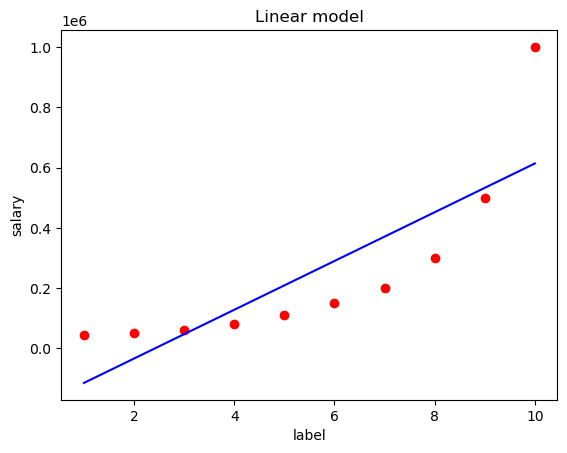

In [16]:
plt.scatter(x,y,color='red')
plt.plot(x, lin_reg.predict(x), color='blue')
plt.title('Linear model')
plt.xlabel('label')
plt.ylabel('salary')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


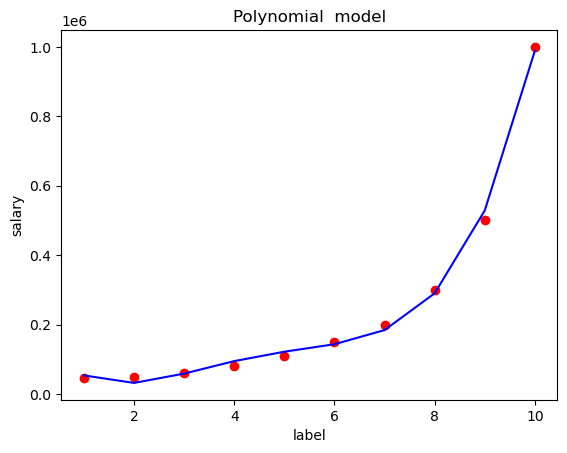

In [17]:
plt.scatter(x,y,color = 'red')
plt.plot(x,lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Polynomial  model')
plt.xlabel('label')
plt.ylabel('salary')
plt.show()

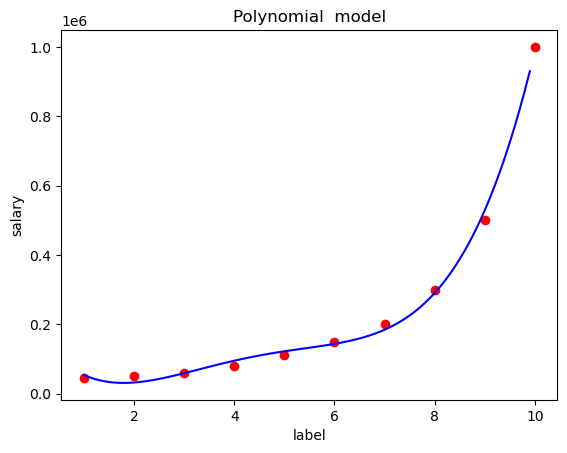

In [21]:

#for higher resolutionand smoother curve
x = [float(Level) for Level in x]
x_grid = np.arange(min(x),max(x),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color='red')
plt.plot(x_grid,lin_reg_2.predict(poly_reg.fit_transform(x_grid)),color='blue')
plt.title('Polynomial  model')
plt.xlabel('label')
plt.ylabel('salary')
plt.show()

In [22]:
#predicting a new result for linear model
# input of predict method should be array like or sparse matrix, shape(n_samples , n_features)
lin_reg.predict([[6.5]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([330378.78787879])

In [31]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.4526516])